In [1]:
%matplotlib inline


# Compute all-to-all connectivity in sensor space


Computes the Phase Lag Index (PLI) between all gradiometers and shows the
connectivity in 3D using the helmet geometry. The left visual stimulation data
are used which produces strong connectvitiy in the right occipital sensors.


In [77]:
# Author: Martin Luessi <mluessi@nmr.mgh.harvard.edu>
#
# License: BSD (3-clause)

import mne
from mne import io
from mne.connectivity import spectral_connectivity
from mne.datasets import sample
from mne.viz import plot_sensors_connectivity

print(__doc__)

Automatically created module for IPython interactive environment


Set parameters



In [78]:
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
event_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'

# Setup for reading the raw data
raw = io.read_raw_fif(raw_fname)
events = mne.read_events(event_fname)

# Add a bad channel
raw.info['bads'] += ['MEG 2443', 'MEG 0111']

# Pick MEG gradiometers
# picks = mne.pick_types(raw.info, meg='grad', eeg=False, stim=False, eog=True,
#                        exclude='bads')

picks = mne.pick_types(raw.info, meg='mag', eeg=False, stim=False, eog=False,
                       exclude='bads')
print(len(picks), type(picks))
# Create epochs for the visual condition
event_id, tmin, tmax = 3, -0.2, 1.5  # need a long enough epoch for 5 cycles
# epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,
#                     baseline=(None, 0),
#                     reject=dict(grad=4000e-13, eog=150e-6))
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,
                    baseline=(None, 0))


# Compute connectivity for band containing the evoked response.
# We exclude the baseline period
fmin, fmax = 3., 9.
sfreq = raw.info['sfreq']  # the sampling frequency
tmin = 0.0  # exclude the baseline period
# epochs.load_data().pick_types(meg='grad')  # just keep MEG and no EOG now
epochs.load_data().pick_types(meg='mag')
con, freqs, times, n_epochs, n_tapers = spectral_connectivity(
    epochs, method='pli', mode='multitaper', sfreq=sfreq, fmin=fmin, fmax=fmax,
    faverage=True, tmin=tmin, mt_adaptive=False, n_jobs=1)

# Now, visualize the connectivity in 3D
# plot_sensors_connectivity(epochs.info, con[:, :, 0]);

101 <class 'numpy.ndarray'>


In [79]:
# type(con), type(freqs), len(freqs[0]), freqs
# len(times)
print(n_epochs, con.shape)

73 (101, 101, 1)


In [80]:
print(raw.info)

<Info | 15 non-empty values
 bads: 4 items (MEG 2443, EEG 053, MEG 2443, MEG 0111)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 GRAD, 102 MAG, 9 STIM, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


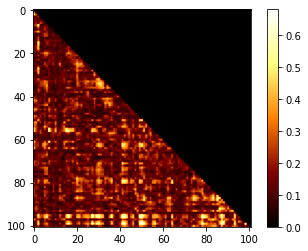

In [88]:
import pylab as pl
im=pl.imshow(con[:,:,0], cmap="afmhot");
pl.colorbar(im);

(101, 3)
(101, 101)


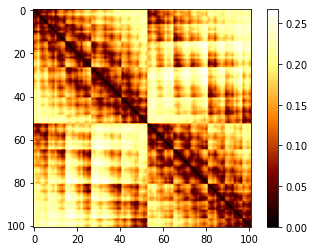

In [89]:
import numpy as np 
import pylab as pl
from sklearn.metrics.pairwise import euclidean_distances

sens_loc = [raw.info['chs'][k]['loc'][:3] for k in picks]
sens_loc_ar = np.array(sens_loc)
print(sens_loc_ar.shape)

dis_matrices = euclidean_distances(sens_loc_ar)
print(dis_matrices.shape)
im = pl.imshow(dis_matrices, cmap='afmhot')
pl.colorbar(im);

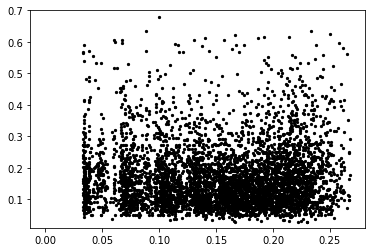

In [101]:
condition = np.abs(con)>1e-5

# x = (con[np.abs(con)>1e-5]).reshape(-1)
# y = (dis_matrices[np.abs(con)>1e-5]).reshape(-1)
pl.scatter(dis_matrices.reshape(-1), con.reshape(-1), s=5, color="k");
pl.ylim(0.01, 0.7);

In [82]:
# Get the strongest connections
# n_con = 20  # show up to 20 connections
# min_dist = 0.05  # exclude sensors that are less than 5cm apart
# threshold = np.sort(con, axis=None)[-n_con]
# ii, jj = np.where(con >= threshold)

# Remove close connections
# con_nodes = list()
# con_val = list()
# for i, j in zip(ii, jj):
#     if linalg.norm(sens_loc[i] - sens_loc[j]) > min_dist:
#         con_nodes.append((i, j))
#         con_val.append(con[i, j])
# con_val = np.array(con_val)
# print (con.shape)
# print(sens_loc_ar)

# for k in picks[:5]:
#     print(raw.info['chs'][k]['ch_name'],raw.info['chs'][k]['loc'][:3])

In [73]:
# print(raw.ch_names)